<a href="https://colab.research.google.com/github/doeungim/ADP_DE2/blob/main/%ED%86%B5%EA%B3%84_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [252]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [253]:
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/pandas/main/BankChurnersUp.csv',index_col=0)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816


In [254]:
## 1. 단일표본 T검정
# 연속형 변수가 있을때, 1개의 변수가 주어진 평균과 같은지 물어본다
# Credit_Limit의 평균이 100000이다

stat, p_val = stats.ttest_1samp(df['Credit_Limit'] , 10000)
print(p_val)

2.871564454116387e-51


In [255]:
## 2. 독립표본 T검정
# 남,여 / 정규, 비정규직 처럼 대립되는 두 집단의 평균 차이가 있는가.

# Gender별로 Credit_Limit의 차이가 있다.

m = df[df['Gender'] == 'M']['Credit_Limit']
f = df[df['Gender'] == 'F']['Credit_Limit']

# 등분산 가정
print(stats.bartlett(m, f))


# 2.1 등분산일때,
stat, p_val = stats.ttest_ind(m, f , equal_var = True)
print(p_val)

# 2.2 등분산이 아닐때,
stat, p_val = stats.ttest_ind(m, f , equal_var = False)

# 2.3 정규성 X , 등분산 X 일때 > 만위트니
stats, p_val = stats.mannwhitneyu(m, f , alternative = 'two-sided')

BartlettResult(statistic=np.float64(2393.8040760235226), pvalue=np.float64(0.0))
0.0


In [256]:
from scipy import stats

url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/sleep.csv"
df = pd.read_csv(url)

print(df.head())
## 3. 대응표본 T검정
# 짝 지어진다. 종속된다. 사전, 사후와 같은 느낌
# 같은 내부에서 차이만 보는 것 이기때문에, 등분산성은 보지 않는다.

wide = df[['extra','group','ID']].\
                                  assign(group = lambda x : x['group'].astype(str)).\
                                  pivot_table(index = 'ID', columns = 'group', values = 'extra').\
                                  reset_index().\
                                  rename(columns = {'1':'g1' , '2':'g2'}).\
                                  dropna()

print(wide)


g1 = wide['g1']
g2 = wide['g2']


# 3.1 정규성 검정
diff = g1 - g2
s_stat, sp_val = stats.shapiro(diff)

# 3.2 모수일때,
t_stats, p_val = stats.ttest_rel(g1, g2)


# 3.3 비모수일때,
w_stat, w_p_val = stats.wilcoxon(g1, g2)

   rownames  extra  group  ID
0         1    0.7      1   1
1         2   -1.6      1   2
2         3   -0.2      1   3
3         4   -1.2      1   4
4         5   -0.1      1   5
group  ID   g1   g2
0       1  0.7  1.9
1       2 -1.6  0.8
2       3 -0.2  1.1
3       4 -1.2  0.1
4       5 -0.1 -0.1
5       6  3.4  4.4
6       7  3.7  5.5
7       8  0.8  1.6
8       9  0.0  4.6
9      10  2.0  3.4


#### 분산분석

,df,sum_sq,mean_sq,F,PR(>F)
C(Marital_Status),3.0,2.868813e+09,9.562709e+08,11.612706,1.355834e-07
Residual,10123.0,8.335981e+11,8.234695e+07,NaN,NaN


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1   group2  meandiff  p-adj    lower      upper   reject
--------------------------------------------------------------
Divorced Married -1281.9032 0.0019 -2199.9543 -363.8521   True
Divorced  Single  -358.8803 0.7542 -1288.7753  571.0146  False
Divorced Unknown    86.7181 0.9978 -1118.5525 1291.9886  False
 Married  Single   923.0229    0.0   419.1629 1426.8829   True
 Married Unknown  1368.6213 0.0007   451.0988 2286.1437   True
  Single Unknown   445.5984 0.6065  -483.7746 1374.9714  False
--------------------------------------------------------------


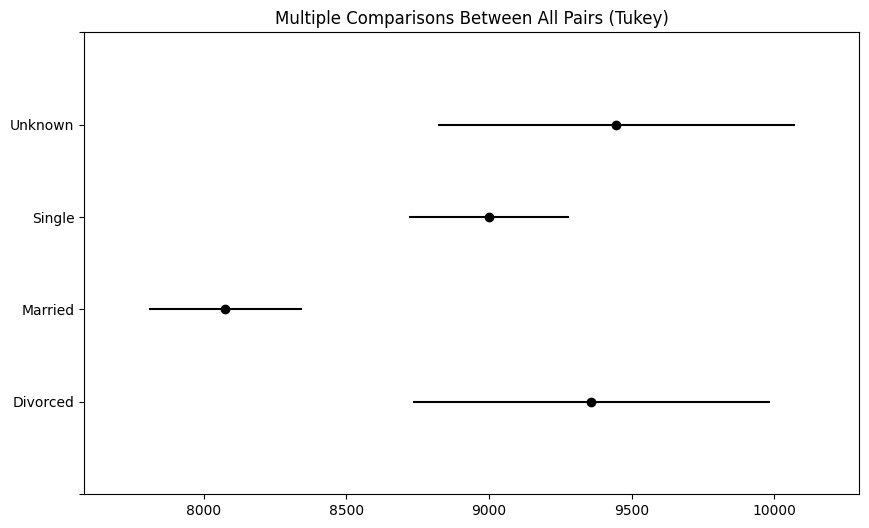

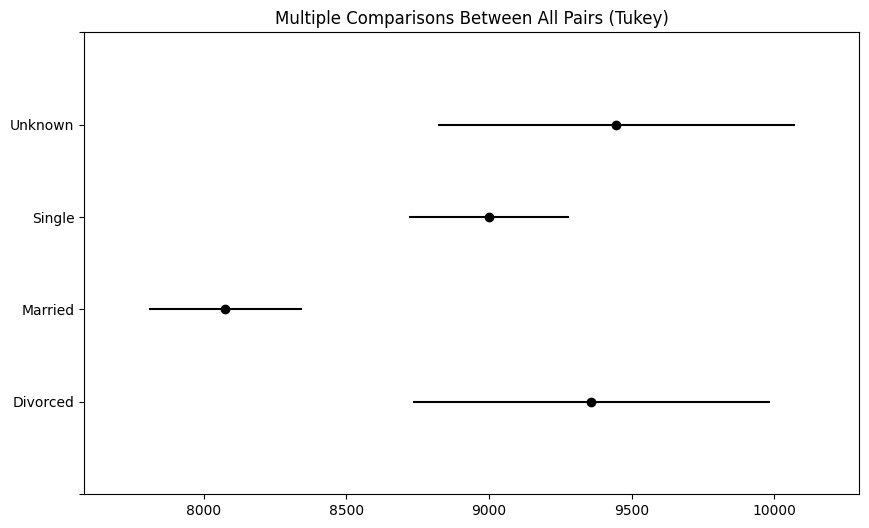

In [257]:
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/pandas/main/BankChurnersUp.csv',index_col=0)
df.head(3)

import statsmodels.api as sm
from statsmodels.formula.api import ols


## 4. 일원분산분석
# 세 집단 사이의 통계 검정
# X 1개 Y 1개


# X : Martial_Status
# Y : Credit Limit

# 4.1) 모수적 일떄,
model = ols('Credit_Limit ~ C(Marital_Status)', data = df).fit()
table = sm.stats.anova_lm(model)

display(table)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = df['Credit_Limit'] ,
                          groups = df['Marital_Status'] ,
                          alpha = 0.05)

print(tukey)
tukey.plot_simultaneous()


In [258]:
# 4.2) 정규성 O / 등분산성 불만족 : Welch`s Anova
import pingouin as pg
res = pg.welch_anova(dv = 'Credit_Limit', between = 'Marital_Status' , data = df)
display(res)


# Games-Howell Post-hoc
gh = pg.pairwise_gameshowell(dv='Credit_Limit', between='Marital_Status', data=df)
print("\nGames-Howell Post-hoc:\n", gh)

,Source,ddof1,ddof2,F,p-unc,np2
0,Marital_Status,3,2009.361048,11.665557,1.406893e-07,0.00343



Games-Howell Post-hoc:
           A        B      mean(A)      mean(B)         diff          se  \
0  Divorced  Married  9358.565107  8076.661895  1281.903212  369.465050   
1  Divorced   Single  9358.565107  8999.684758   358.880349  378.646254   
2  Divorced  Unknown  9358.565107  9445.283178   -86.718071  492.671396   
3   Married   Single  8076.661895  8999.684758  -923.022863  195.920135   
4   Married  Unknown  8076.661895  9445.283178 -1368.621283  371.129112   
5    Single  Unknown  8999.684758  9445.283178  -445.598420  380.270141   

          T           df      pval    hedges  
0  3.469620   952.112931  0.003053  0.146907  
1  0.947798  1046.229337  0.778988  0.037952  
2 -0.176016  1494.970946  0.998063 -0.009094  
3 -4.711220  8057.207887  0.000015 -0.102628  
4 -3.687723   951.213282  0.001364 -0.156694  
5 -1.171794  1044.421475  0.644831 -0.047078  


In [259]:
# 4.3) 정규성 X / 등분산성 만족 OR 정규, 등분산성 불만족 - Krusal-Wallis
import scikit_posthocs as sp
k = df[['Marital_Status', 'Credit_Limit']]

g = [group['Credit_Limit'] for name, group in k.groupby('Marital_Status') ]
stat, p_val = stats.kruskal(* g)
print(p_val)


# 사후검정
dunn = sp.posthoc_dunn(df,
                        val_col = 'Credit_Limit',
                        group_col = 'Marital_Status',
                        p_adjust = 'bonferroni')

print(dunn)



2.7505962269323914e-05
          Divorced   Married    Single   Unknown
Divorced  1.000000  0.008024  0.960045  1.000000
Married   0.008024  1.000000  0.006883  0.002052
Single    0.960045  0.006883  1.000000  0.457752
Unknown   1.000000  0.002052  0.457752  1.000000


#### 5.짝 지은 ANOVA

In [260]:
## 5.짝 지은 ANOVA
# 대상에게 A,B,C를 전과 후로 복용 시킴
df = pd.read_csv('https://raw.githubusercontent.com/doeungim/ADP_DE2/refs/heads/main/dataset/Repeated%20Measures%20ANOVA.csv')
print(df.head(3))

df.Drug.value_counts()

   Subject Drug  Time      Score
0        1    A   Pre  51.490142
1        1    A  Post  54.585207
2        1    B   Pre  56.943066


,count
Drug,
A,40
B,40
C,40


('A', 'Post') 0.30069692411114524 정규분포이다
('A', 'Pre') 0.315455375680571 정규분포이다
('B', 'Post') 0.7035818981385875 정규분포이다
('B', 'Pre') 0.9989769414103544 정규분포이다
('C', 'Post') 0.8451329583368944 정규분포이다
('C', 'Pre') 0.8554116275919448 정규분포이다
                 Anova
          F Value  Num DF  Den DF Pr > F
----------------------------------------
Drug       78.5250 2.0000 38.0000 0.0000
Time      124.7940 1.0000 19.0000 0.0000
Drug:Time   1.0263 2.0000 38.0000 0.3681



[  Contrast  A  B  Paired  Parametric          T   dof alternative  \
 0     Drug  A  B    True        True  -3.894778  19.0   two-sided   
 1     Drug  A  C    True        True -10.698615  19.0   two-sided   
 2     Drug  B  C    True        True  -5.500891  19.0   two-sided   
 
           p-unc        p-corr p-adjust       BF10    hedges  
 0  9.743609e-04  9.743609e-04     holm     37.406 -1.326441  
 1  1.754440e-09  5.263319e-09     holm  6.323e+06 -3.658381  
 2  2.629882e-05  5.259765e-05     holm    920.291 -1.664015  ,
   Contrast  A  B  Paired  Parametric         T   dof alternative  \
 0     Drug  A  B    True        True -5.366027  19.0   two-sided   
 1     Drug  A  C    True        True -8.376233  19.0   two-sided   
 2     Drug  B  C    True        True -4.239534  19.0   two-sided   
 
           p-unc        p-corr p-adjust       BF10    hedges  
 0  3.533347e-05  7.066695e-05     holm    705.731 -1.733393  
 1  8.412566e-08  2.523770e-07     holm  1.745e+05 -2.677706 

[  Contrast     A    B  Paired  Parametric         T   dof alternative  \
 0     Time  Post  Pre    True        True  5.215615  19.0   two-sided   
 
       p-unc     BF10    hedges  
 0  0.000049  524.145  1.546463  ,
   Contrast     A    B  Paired  Parametric         T   dof alternative  \
 0     Time  Post  Pre    True        True  7.428475  19.0   two-sided   
 
           p-unc       BF10    hedges  
 0  4.949212e-07  3.414e+04  2.291028  ,
   Contrast     A    B  Paired  Parametric         T   dof alternative  \
 0     Time  Post  Pre    True        True  6.139815  19.0   two-sided   
 
       p-unc      BF10    hedges  
 0  0.000007  3173.952  1.826355  ]

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1   group2  meandiff  p-adj    lower      upper   reject
--------------------------------------------------------------
Divorced Married -1281.9032 0.0019 -2199.9543 -363.8521   True
Divorced  Single  -358.8803 0.7542 -1288.7753  571.0146  False
Divorced Unknown    86.7181 0.9978 -1118.5525 1291.9886  False
 Married  Single   923.0229    0.0   419.1629 1426.8829   True
 Married Unknown  1368.6213 0.0007   451.0988 2286.1437   True
  Single Unknown   445.5984 0.6065  -483.7746 1374.9714  False
--------------------------------------------------------------


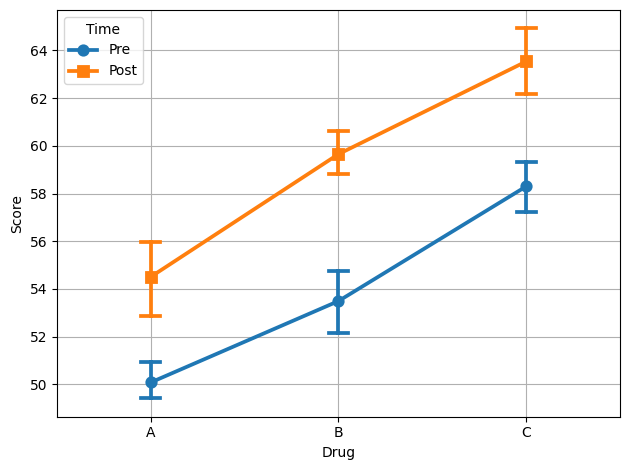

In [261]:
## 5.1 모수일때 - Pivoting을 하지않고 사용
# 조건 Drug, Time에 대한 구조로 해야함

# 가설
# 1. Drug 주효과
# 귀무 : A,B,C 에 대한 평균 반응값은 동일하다
# 2. Time 주효과
# 귀무 : Pre, Post간 평균 반응 값은 동일하다.
# 3. Drug X Time 상호작용
# 귀무 : Drug의 효과가 Time에 따라 변하지 않는다.


# 5.1.1 정규성 검정
for key, group in df.groupby(['Drug','Time']) :
  stat, p_val = stats.shapiro(group['Score'])
  decision = '정규분포가 아니다' if p_val < 0.05 else '정규분포이다'
  print(key, p_val, decision)

# 5.1.2 AnovaRM
from statsmodels.stats.anova import AnovaRM

model = AnovaRM(df,
                depvar = 'Score',
                subject = 'Subject',
                within = ['Drug','Time']).fit()

print(model)


# 5.1.3 AnovaRM - 사후검정
# 방법) Drug / Time 따로 확인 한 후, 상호작용이 있는 경우에는 Drug + Time으로 본다.

# 5.1.3.1 Drug 비교 - Time별로 쪼개서 t검정
drug = []
for t  in df['Time'].unique() :
  target = df[df['Time'] == t]
  drug_test = pg.pairwise_ttests(dv = "Score",
                                 within = "Drug" ,
                                 subject = 'Subject' ,
                                 data = target,
                                 padjust = 'holm',
                                 effsize = "hedges")
  drug.append(drug_test)
display(drug)

# 5.1.3.2 Time 비교 - Drug별로 쪼개서 T검정
time = []
for d  in df['Drug'].unique() :
  target = df[df['Drug'] == d]
  time_test = pg.pairwise_ttests(dv = 'Score',
                                within = 'Time' ,
                                subject = "Subject" ,
                                data = target,
                                padjust = 'holme',
                                effsize = "hedges")

  time.append(time_test)

display(time)


# 5.1.3.3 상호작용 검정 (있다고 가)
df['comb'] = df['Drug'] + df['Time']

cell_posthoc = pg.pairwise_ttests(dv='Score', within='comb', subject='Subject',
                                  data=df, padjust='holm', effsize='hedges')

print(tukey)

sns.pointplot(data = df,
              x = 'Drug' , y = 'Score', hue = 'Time', markers=['o', 's'], capsize=0.1)
plt.grid(True)
plt.tight_layout()
plt.show()

In [262]:
## 5.1 비모수일때(1),
pivot_df = df.pivot_table(index = ['Subject' ,'Drug'] ,
                          columns = 'Time',
                          values = 'Score').reset_index()

pivot_df['diff'] = pivot_df['Post'] - pivot_df['Pre']
display(pivot_df.head(4))

pivot_re = pivot_df.pivot(index = 'Subject', columns = 'Drug', values = 'diff')
display(pivot_re.head(4))


from scipy.stats import friedmanchisquare
stat, p = friedmanchisquare(pivot_re['A'], pivot_re['B'], pivot_re['C'])
print(f"Friedman Δ(Post-Pre) across Drugs: stat={stat:.3f}, p={p:.4f}")


# 사후분석
dunn = sp.posthoc_dunn(pivot_df,
                       val_col = 'diff' ,
                       group_col = 'Drug' ,
                       p_adjust = 'bonferroni')

Time,Subject,Drug,Post,Pre,diff
0,1,A,54.585207,51.490142,3.095065
1,1,B,64.569090,56.943066,7.626024
2,1,C,62.297589,57.297540,5.000049
3,2,A,57.302304,54.737638,2.564666


Drug,A,B,C
Subject,,,
1,3.095065,7.626024,5.000049
2,2.564666,8.036103,4.993064
3,-1.465728,8.487891,8.981235
4,3.487161,-0.074275,0.523171


Friedman Δ(Post-Pre) across Drugs: stat=2.100, p=0.3499


      차량 A  차량 B  차량 C
피험자1     4     1     6
피험자2     3     4     6
피험자3     2     4     6
피험자4     4     3     2
피험자5     4     1     6
피험자6     6     4     2
피험자7     5     3     5
피험자8     6     3     2
피험자9     2     4     6
0.8668778997501834
          0         1         2
0  1.000000  0.687513  0.884741
1  0.687513  1.000000  0.397199
2  0.884741  0.397199  1.000000
          차량 A      차량 B      차량 C
차량 A  1.000000  0.656077  1.000000
차량 B  0.656077  1.000000  0.167109
차량 C  1.000000  0.167109  1.000000


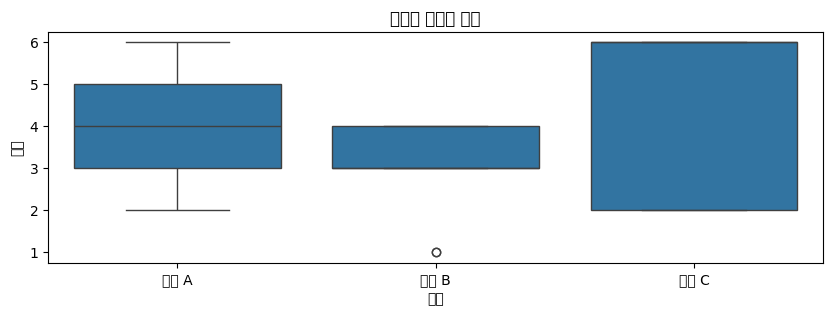

In [263]:
## 5.1 비모수일때(2)

# 데이터 정의
data = {
    '차량 A': [4, 3, 2, 4, 4, 6, 5, 6, 2],
    '차량 B': [1, 4, 4, 3, 1, 4, 3, 3, 4],
    '차량 C': [6, 6, 6, 2, 6, 2, 5, 2, 6]
}
# 인덱스 정의
index = ['피험자1', '피험자2', '피험자3', '피험자4', '피험자5', '피험자6', '피험자7', '피험자8', '피험자9']

# DataFrame 생성
df = pd.DataFrame(data, index=index)

# 출력
print(df)
df2 = df.reset_index(drop = 'index')
stat , p = friedmanchisquare(df2.values[0] , df2.values[1], df2.values[2])
print(p)
# 사후분석 -Friedman : Nemenyi Test - value로 검정
post = sp.posthoc_nemenyi_friedman(df.values)
print(post)

# 사후분석 Dunn - metling 데이터 사용
df_melt = df.melt(var_name = '차량', value_name ='점수')
dunn = sp.posthoc_dunn(df_melt, val_col = '점수', group_col ='차량', p_adjust ='bonferroni')
print(dunn)

df_melted = df.melt(var_name='차량', value_name='점수')
plt.figure(figsize=(10,3))
sns.boxplot(data=df_melted, x='차량', y='점수')
plt.title('차량별 만족도 분포')
plt.show()


#### 6. Two Way Anova

In [264]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


0.04086062802220418
                  sum_sq    df          F        PR(>F)
C(am)          36.766919   1.0   3.998759  5.608373e-02
C(cyl)        456.400921   2.0  24.819011  9.354735e-07
C(am):C(cyl)   25.436511   2.0   1.383233  2.686140e-01
Residual      239.059167  26.0        NaN           NaN


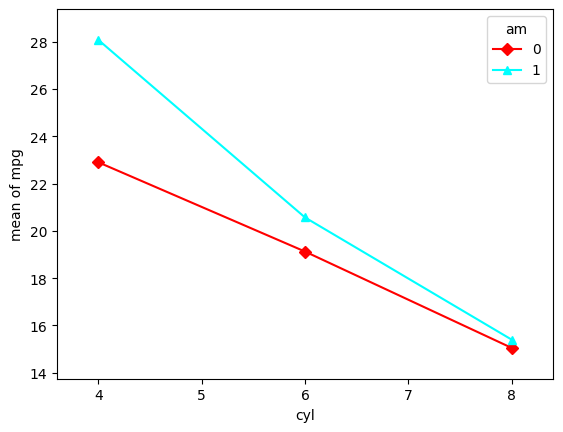

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   0_4    0_6   -3.775 0.5872 -10.8906  3.3406  False
   0_4    0_8    -7.85 0.0054 -13.8638 -1.8362   True
   0_4    1_4    5.175 0.1547  -1.1323 11.4823  False
   0_4    1_6  -2.3333 0.9315  -9.9402  5.2735  False
   0_4    1_8     -7.5 0.1073 -16.0047  1.0047  False
   0_6    0_8   -4.075 0.2192  -9.4539  1.3039  False
   0_6    1_4     8.95 0.0007   3.2448 14.6552   True
   0_6    1_6   1.4417 0.9883  -5.6739  8.5572  False
   0_6    1_8   -3.725 0.7159 -11.7933  4.3433  False
   0_8    1_4   13.025    0.0   8.7726 17.2774   True
   0_8    1_6   5.5167 0.0859  -0.4971 11.5304  False
   0_8    1_8     0.35    1.0  -6.7656  7.4656  False
   1_4    1_6  -7.5083 0.0129 -13.8156 -1.2011   True
   1_4    1_8  -12.675 0.0002 -20.0403 -5.3097   True
   1_6    1_8  -5.1667 0.4437 -13.6714  3.3381  False
----------------------------

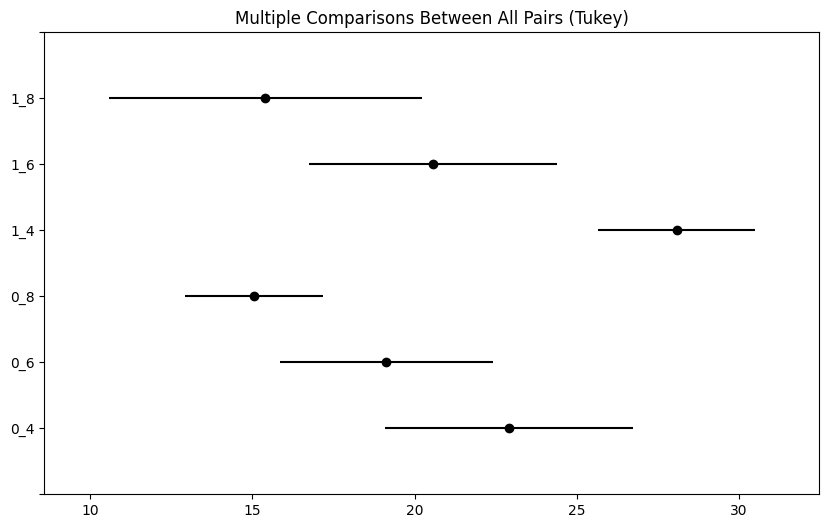

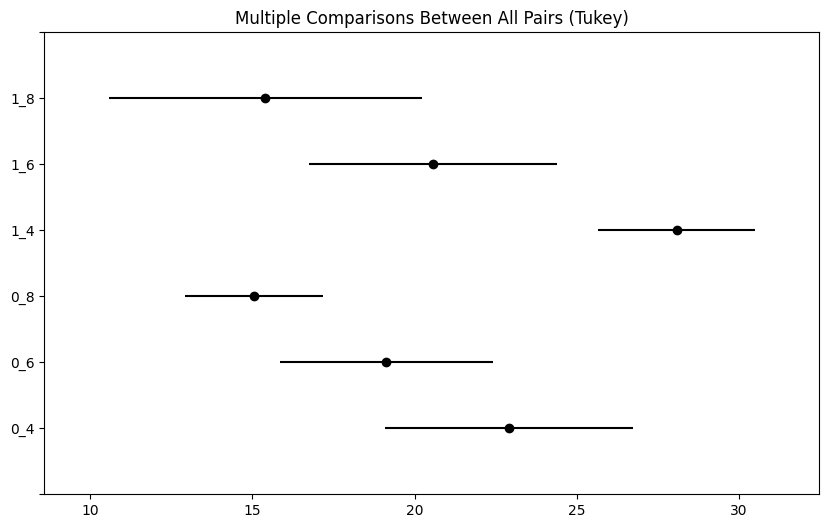

In [265]:
# 6.1 모수적 검증
# 6.1.1 정규성 확인
# am과 cyl에 대헤서 정규분포인지 확인한다.
cols = ['am','cyl']

sha = []
for key, group  in df.groupby(cols) :
  stat, p_val = stats.shapiro(group['mpg'])
  sha.append([key, p_val])

pd.DataFrame(sha)

# 6.1.2 등분산성 확인
g = [group['mpg'] for name, group in df.groupby(cols)]
lstat, lpval = stats.levene(*g)
print(lpval)

# 6.1.3 모델
model = ols('mpg ~ C(am) * C(cyl)', data = df).fit()
ano = anova_lm(model, typ = 2)
print(ano)

# 6.1.4 사후검정
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(df['cyl'] , df['am'] , df['mpg'] , markers = ['D','^'])
plt.show()


# 상호작용이 있기 떄문에, Group별로 확인
df['group'] = df['am'].astype(str) + '_' +  df['cyl'].astype(str)
tukey = pairwise_tukeyhsd(endog = df['mpg'] ,
                          groups = df['group'],
                          alpha = 0.05)

print(tukey)
tukey.plot_simultaneous()

In [266]:
# 6.2 비모수적 검증
# 조건 : 정규성/등분산성 위배 혹은 순서 척도

# 6.2.1 비모수 모델 구현
def ray_hare(data, dv, f1, f2) :
  data = data.copy()
  data['rank'] = stats.rankdata(data[dv])

  data['combo'] = data[f1].astype(str) + '_' + data[f2].astype(str)

  # 각 요인에 대한 ANOVA
  f = 'rank ~ C({}) + C({}) + C(combo)'.format(f1, f2)
  model = ols(f , data = data).fit()
  anova_table = sm.stats.anova_lm(model)

  # Step 4: H값 계산 (ANOVA SS를 기반으로)
  anova_table['H'] = (12 / (len(data) * (len(data)+1))) * anova_table['sum_sq']
  anova_table['p-unc'] = 1 - stats.chi2.cdf(anova_table['H'], anova_table['df'])

  return anova_table[['df', 'sum_sq', 'H', 'p-unc']]

result = ray_hare(df, dv = 'mpg' , f1 = 'am', f2 = 'cyl')
result


# 6.2.2 사후검정 -
# 상호작용이 유의할때 - 쌍별 Man-Whitney U Test
# 상호작용이 유의하지 않을 때, am / cyl 따로 주효과 단위로 보정

# 6.2.2.1 상호작용이 유의할때,
from itertools import combinations
group = df['group'].unique()
pairs = list(combinations(group, 2))

res = []
for v1, v2 in pairs :
  data1 = df.loc[df['group'] == v1]['mpg']
  data2 = df.loc[df['group'] == v2]['mpg']

  stat, p_val = stats.mannwhitneyu(data1, data2)
  res.append({
      'v1' : v1,
      'v2' : v2,
      'P_value' : p_val ,
      'Decision' : '차이가 없다' if p_val > 0.05 else '차이가 있다'
      })

print(pd.DataFrame(res))


# 6.2.2.2 상호작용이 유의하지 않을때 - 주효과만 검정
# am (2 수준) / cyl (3 수준) - 각각 만휘트니와 크루스칼 비교 실행
cols = ['am','cyl']

res = []
for col in cols :
  levels = sorted(df[col].unique())
  k = len(levels)

  if k == 2 :
    g1 = df.loc[df[col] == levels[0], 'mpg'].values
    g2 = df.loc[df[col] == levels[1], 'mpg'].values

    stat, p_val = stats.mannwhitneyu(g1, g2, alternative = 'two-sided')
    res.append([col, 'Mann–Whitney U', p_val])


  else :
    group  = [group['mpg'].values for name, group in df.groupby(col)]
    stat, p_val = stats.kruskal(* group)
    res.append([col, 'Kruskal–Wallis', float(p_val)])

print(res)


     v1   v2   P_value Decision
0   1_6  1_4  0.018365   차이가 있다
1   1_6  0_6  0.372456   차이가 없다
2   1_6  0_8  0.011319   차이가 있다
3   1_6  0_4  0.076523   차이가 없다
4   1_6  1_8  0.138641   차이가 없다
5   1_4  0_6  0.010571   차이가 있다
6   1_4  0_8  0.000244   차이가 있다
7   1_4  0_4  0.151171   차이가 없다
8   1_4  1_8  0.049491   차이가 있다
9   0_6  0_8  0.020933   차이가 있다
10  0_6  0_4  0.057143   차이가 없다
11  0_6  1_8  0.133333   차이가 없다
12  0_8  0_4  0.011392   차이가 있다
13  0_8  1_8  0.927105   차이가 없다
14  0_4  1_8  0.200000   차이가 없다
[['am', 'Mann–Whitney U', np.float64(0.0018713913331785542)], ['cyl', 'Kruskal–Wallis', 2.5662167953453215e-06]]


#### 7. N-Way ANOVA (GLM기반 ANOVA)

In [267]:
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


,조합,shapiro p_val,shapiro decision,Levene pval,Levene Decision
0,"(4, 1, 4)",0.538379,정규분포이다,0.077087,등분산이다
1,"(8, 0, 3)",0.504114,정규분포이다,0.077087,등분산이다


# n-way ANOVA 결과
                          sum_sq    df          F    PR(>F)
Intercept             462.250000   1.0  43.573301  0.000001
C(cyl)                 69.034333   2.0   3.253709  0.057825
C(am)                  58.157067   1.0   5.482088  0.028677
C(gear)                14.893778   2.0   0.701970  0.506373
C(cyl):C(am)           23.610001   2.0   1.112781  0.346447
C(cyl):C(gear)         26.775837   4.0   0.630996  0.602791
C(am):C(gear)          59.408333   2.0   2.800019  0.082536
C(cyl):C(am):C(gear)   32.090847   4.0   0.756249  0.530572
Residual              233.388333  22.0        NaN       NaN


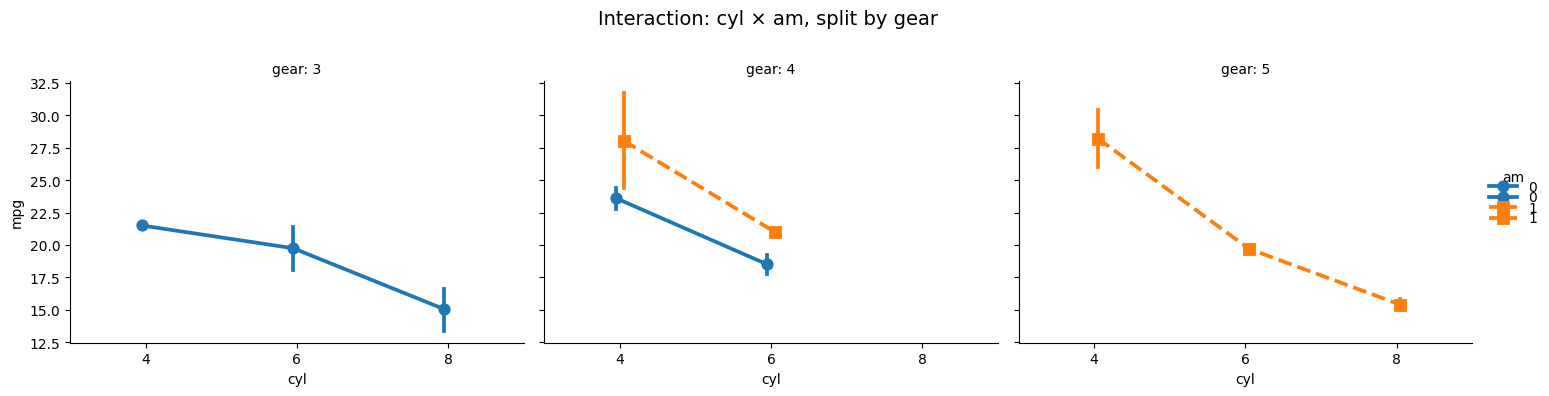

,group1,group2,meandiff,p-adj,lower,upper,reject
0,043,044,2.1000,0.9999,-11.8827,16.0827,False
1,043,063,-1.7500,1.0000,-15.7327,12.2327,False
2,043,064,-3.0000,0.9986,-16.9827,10.9827,False
3,043,083,-6.4500,0.6676,-18.3330,5.4330,False
4,043,144,6.5333,0.6951,-5.7983,18.8649,False
5,043,145,6.7000,0.7950,-7.2827,20.6827,False
6,043,164,-0.5000,1.0000,-14.4827,13.4827,False
7,043,165,-1.8000,1.0000,-17.9459,14.3459,False
8,043,185,-6.1000,0.8663,-20.0827,7.8827,False
9,044,063,-3.8500,0.9678,-15.2669,7.5669,False


In [268]:
# 1.정규 / 등분산성 검정
cols = df[['cyl','am','gear']].columns.to_list()

res =[]
for key, group in df.groupby(cols) :
  # 샘플의 수가 3개 이상이면 이라는 가정을 주어서 정규성 검정
  if len(group) >= 3 :
    stat, p = stats.shapiro(group['mpg'])
    s_decision = '정규분포가 아니다' if p < 0.05 else '정규분포이다'

    res.append({
        '조합' : key,
        'shapiro p_val' : p,
        'shapiro decision' : s_decision
    })

g = [group['mpg'] for name, group in df.groupby(cols)]
stat, leven_p = stats.levene(*g)
l_decision = '등분산 아니다' if leven_p < 0.05 else '등분산이다'

res = pd.DataFrame(res)
res['Levene pval'] = leven_p
res['Levene Decision'] = l_decision
display(res)


# 7.1 모수적 대안일때,
# 1. 3요인 ANOVA
model = ols('mpg ~ C(cyl) * C(am) * C(gear)', data=df).fit()
res = sm.stats.anova_lm(model, typ=3)
print("# n-way ANOVA 결과")
print(res)

# 2. 3요인 교호작용 시각화: gear 별로 cyl x am
# interaction_plot 대체 > sns.catplot
g = sns.catplot(
    data=df, kind='point',
    x='cyl', y='mpg', hue='am',
    col='gear', dodge=True,
    height=4, aspect=1.2,
    markers=["o", "s"], linestyles=["-", "--"]
)

g.set_axis_labels("cyl", "mpg")
g.set_titles("gear: {col_name}")
g.add_legend()

plt.subplots_adjust(top=0.8)
g.fig.suptitle("Interaction: cyl × am, split by gear", fontsize=14)
plt.show()

# 3. 사후분석
df['group'] = df['am'].astype(str) + df['cyl'].astype(str) + df['gear'].astype(str)
tukey = pairwise_tukeyhsd(df['mpg'], df['group'])
pd.DataFrame(tukey.summary().data[1:] , columns = tukey.summary().data[0])


In [269]:
# N-way ANOVA의 비모수 대안 - 직접구현
from statsmodels.api import stats as sm_stats
from scipy.stats import rankdata, chi2

def ray_hare(data, dv, f1, f2, f3) :
  df = data.copy()
  df['rank'] = rankdata(df[dv])
  df['factor1'] = df[f1].astype(str) + "_" + df[f2].astype(str)
  df['factor2'] = df[f1].astype(str) + "_" + df[f3].astype(str)
  df['factor3'] = df[f2].astype(str) + "_" + df[f3].astype(str)
  df['all'] = df[f1].astype(str) + "_" + df[f2].astype(str) + "_" + df[f3].astype(str)

  f = f'rank ~ C({f1}) + C({f2}) + C({f3}) + C(factor1) + C(factor2) + C(factor3) + C(all)'
  model = ols(f, data = df).fit()
  table = anova_lm(model, typ = 2)

  return table

print(ray_hare(df, dv ='mpg', f1 = 'cyl', f2 = 'am', f3 = 'gear'))


# 사후검정 - 조합별 중앙값의 차이
# 조합 생성
df['group']= df.apply(lambda x : str(x['cyl']) +"_"+ str(x['am']) + "_" +str(x['gear']), axis = 1)

res = []
for g1, g2 in combinations(df['group'].unique(),2) :
  v1 = df[df['group'] == g1]['mpg']
  v2 = df[df['group'] == g2]['mpg']

  stat, p = stats.mannwhitneyu(v1, v2)
  res.append([v1, v2, p])

display(pd.DataFrame(res).head(4))

                 sum_sq    df          F        PR(>F)
C(cyl)       399.493322   2.0  10.728471  5.597558e-04
C(am)          0.550817   1.0   0.029585  8.650086e-01
C(gear)       17.264371   2.0   0.463638  6.349981e-01
C(factor1)  1249.399216   5.0  13.421144  4.560016e-06
C(factor2)  1473.417304   7.0  11.305403  5.155045e-06
C(factor3)    20.278060   3.0   0.363048  7.802963e-01
C(all)      2314.895833   9.0  13.814885  3.809231e-07
Residual     409.604167  22.0        NaN           NaN


,0,1,2
0,"0 21.0 1 21.0 Name: mpg, dtype: float64",2 22.8 17 32.4 18 30.4 19 33.9 25...,0.065133
1,"0 21.0 1 21.0 Name: mpg, dtype: float64","3 21.4 5 18.1 Name: mpg, dtype: float64",1.000000
2,"0 21.0 1 21.0 Name: mpg, dtype: float64",4 18.7 6 14.3 11 16.4 12 17.3 13...,0.035156
3,"0 21.0 1 21.0 Name: mpg, dtype: float64","7 24.4 8 22.8 Name: mpg, dtype: float64",0.220671


#### 8. MANOVA
- 종속변수 : 반드시 2개 이상
- 요인 : 1개 이상

In [270]:
df = pd.read_csv('https://raw.githubusercontent.com/doeungim/ADP_DE2/refs/heads/main/dataset/MANOVA.csv')
df.head(4)

,Group,Gender,Math,Reading
0,A,M,72.483571,74.446943
1,A,M,73.238443,81.092119
2,A,M,68.829233,74.063452
3,A,M,77.896064,78.069739


('A', 'F') 0.06101433965645336 정규분포이다
('A', 'M') 0.8586336009052661 정규분포이다
('B', 'F') 0.26173385806869065 정규분포이다
('B', 'M') 0.6172114488849136 정규분포이다
('C', 'F') 0.7157623239356475 정규분포이다
('C', 'M') 0.5174523085109054 정규분포이다
('A', 'F') 0.24075166346116272 정규분포이다
('A', 'M') 0.7770972410993161 정규분포이다
('B', 'F') 0.7117620532186558 정규분포이다
('B', 'M') 0.18665695961311785 정규분포이다
('C', 'F') 0.03490915030607052 정규분포가 아니다
('C', 'M') 0.442272628500209 정규분포이다
                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF   F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda   0.0096 2.0000 113.0000 5824.2495 0.0000
         Pillai's trace   0.9904 2.0000 113.0000 5824.2495 0.0000
 Hotelling-Lawley trace 103.0841 2.0000 113.0000 5824.2495 0.0000
    Roy's greatest root 103.0841 2.0000 1

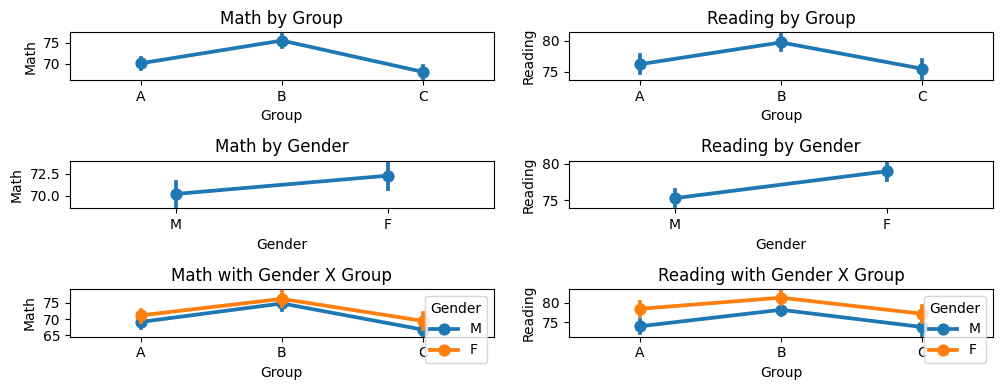

In [271]:
# Y값이 Match, Reading 으로 여러개
# 요인은 Group + Gender (2요인) - 범주형

# 1.정규성 가정
for y in ['Math','Reading'] :
  for key, group in df.groupby(['Group','Gender']) :
    stat, p_val = stats.shapiro(group[y])
    decision = '정규분포가 아니다' if p_val < 0.05  else '정규분포이다'
    print(key, p_val, decision)


# 2. MANOVA 수행
from statsmodels.multivariate.manova import MANOVA
df['Group_Gender'] = df['Group'] + "_" + df['Gender']

result = MANOVA.from_formula("Math + Reading ~ Group * Gender", data = df).mv_test()
print(result)


# 3. 사후분석
factors = ['Group','Gender']
y = ['Math','Reading']

res = []
for f in factors :
  for y_var in y :
    # 각 요인의 유니크한 값
    cnt = df[f].unique()
    if len(cnt) == 2 :
      levels = sorted(df[f].unique())
      g1 = df[df[f] == levels[0]][y_var]
      g2 = df[df[f] == levels[1]][y_var]

      # ttest_ind
      stat, p_val = stats.ttest_ind(g1, g2)
      res.append({
          'Factor' : f,
          'p_value' : p_val  })

    else :
      model = ols(f"{y_var} ~ C({f})", data = df).fit()
      tukey = pairwise_tukeyhsd(df[y_var], df[f])
      tukey_df = pd.DataFrame(tukey._results_table.data[1:],
                              columns = tukey._results_table[0:])


  print(pd.DataFrame(res))
  print(tukey_df)


  ## 사후분석의 시각화
fig, axes = plt.subplots(3,2,figsize = (10, 4))

for i, factor in enumerate(factors) :
  for j, y_value in enumerate(y) :
    ax = axes[i][j]
    sns.pointplot(data = df, x = factor, y = y_value, ax = ax)
    ax.set_title(f'{y_value} by {factor}')


for j, y_value in enumerate(y) :
  ax = axes[2][j]
  sns.pointplot(data = df, x = 'Group' , y = y_value, hue = 'Gender', ax = ax)
  ax.set_title(f'{y_value} with Gender X Group')

plt.tight_layout()
plt.show()

#### 9. ANCOVA
- 종속변수 : 1 개 (필수)
- 요인 : 1개 이상
- 수치형 공변량 : wt (필수) y에 영향을 주지만 비교 대상이 아님

- 가정
1. 정규성 : 잔차가 정규분포
2. 등분산 : 잔차의 분산이 일정
3. 공변량과 종속변수의 선형성 : 공변량과 종속변수는 선형 관계여야한다
4. 회귀선의 동질성: 그룹별 회귀선의 기울기(공변량 효과)는 동일해야한다 - 상호작용 없음

,Group,Shapiro p,정규성
0,"(0, 4)",0.666667,정규분포
1,"(0, 6)",0.666667,정규분포
2,"(0, 8)",0.666667,정규분포
3,"(1, 4)",0.666667,정규분포
4,"(1, 6)",0.666667,정규분포
5,"(1, 8)",0.666667,정규분포


등분산성 p = 0.0409 → 등분산 아님
               sum_sq    df          F    PR(>F)
wt          75.928202   1.0  14.181355  0.000950
am           2.664867   1.0   0.497726  0.487293
wt:am       15.835988   1.0   2.957739  0.098339
cyl         49.502034   1.0   9.245655  0.005633
wt:cyl       0.206836   1.0   0.038631  0.845835
am:cyl       1.725016   1.0   0.322187  0.575568
wt:am:cyl    8.165907   1.0   1.525173  0.228793
Residual   128.498074  24.0        NaN       NaN


,sum_sq,df,F,PR(>F)
wt,75.928202,1.0,14.181355,0.000950
am,2.664867,1.0,0.497726,0.487293
wt:am,15.835988,1.0,2.957739,0.098339
cyl,49.502034,1.0,9.245655,0.005633
wt:cyl,0.206836,1.0,0.038631,0.845835
am:cyl,1.725016,1.0,0.322187,0.575568
wt:am:cyl,8.165907,1.0,1.525173,0.228793
Residual,128.498074,24.0,NaN,NaN



Tukey HSD for cyl
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     4      6  -6.9208 0.0003 -10.7693 -3.0722   True
     4      8 -11.5636    0.0 -14.7708 -8.3565   True
     6      8  -4.6429 0.0112  -8.3276 -0.9581   True
-----------------------------------------------------


,Factor,T-test p
0,am,0.000285


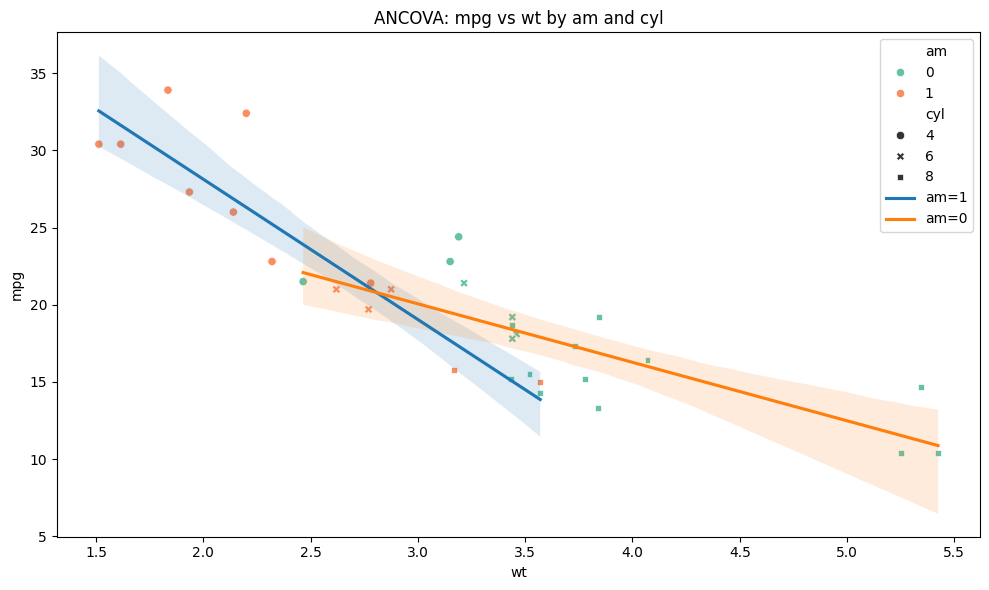


1. 회귀선 해석 (공변량: wt)
- 차량무게(wt)가 올라갈 수록 mpg(연비)가 감소하는 음의 상관관계
- AM (0,1)과 모두 같은 방향의 관계가 관측
- 기울기가 비슷함으로, 두 그룹에서 유사한 방향
즉, wt 무게의 영향을 통제한 후, am 변수의 주효과를 확인하려는 것이 핵심

2. AM 주효과
- 같은 무게(wt)라고 하더라도 am =1이 전반적으로 위에 위치

3. 공변량 wt
- wt를 통제한 후에도 차이가 존재 > 처치 효과 존재 가능성이 존재




In [272]:
# 예) mpg ~ am + cyl + wt
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
df.head()

# 9.1) 정규성/등분산성 검정
res = []
for key, group in df.groupby(['am','cyl']) :
  stat, p_val = stats.shapiro(group['mpg'])
  res.append({'Group': key, 'Shapiro p': p, '정규성': '정규분포' if p > 0.05 else '비정규분포'})
display(pd.DataFrame(res))

groups = [g['mpg'].values for _, g in df.groupby(['am', 'cyl'])]
stat, p = stats.levene(*groups)
print(f'등분산성 p = {p:.4f} → {"등분산" if p > 0.05 else "등분산 아님"}')


# 2) 상호작용 검정 (공변량 x 요인)
model = ols('mpg ~ wt * am * cyl', data = df).fit()
t = anova_lm(model, typ = 2)
print(t)


# 3) ANOCOVA 수행 model = ols('mpg ~ wt + am + cyl', data=df).fit()
result = anova_lm(model, typ=2)
display(result)


# 4) 사후분석
res = []
for factor in ['am', 'cyl']:
    if df[factor].nunique() == 2:
        level = df[factor].unique()
        g1 = df[df[factor] == level[0]]['mpg']
        g2 = df[df[factor] == level[1]]['mpg']
        from scipy.stats import ttest_ind
        stat, p_val = ttest_ind(g1, g2, equal_var=True)
        res.append({'Factor': factor, 'T-test p': p_val})
    else:
        tukey = pairwise_tukeyhsd(df['mpg'], df[factor])
        print(f'\nTukey HSD for {factor}')
        print(tukey.summary())
display(pd.DataFrame(res))


# 회귀선
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='wt', y='mpg', hue='am', style='cyl', palette='Set2')
for val in df['am'].unique():
    sns.regplot(data=df[df['am'] == val], x='wt', y='mpg', scatter=False, label=f'am={val}')
plt.title('ANCOVA: mpg vs wt by am and cyl')
plt.legend()
plt.tight_layout()
plt.show()

print('''
1. 회귀선 해석 (공변량: wt)
- 차량무게(wt)가 올라갈 수록 mpg(연비)가 감소하는 음의 상관관계
- AM (0,1)과 모두 같은 방향의 관계가 관측
- 기울기가 비슷함으로, 두 그룹에서 유사한 방향
즉, wt 무게의 영향을 통제한 후, am 변수의 주효과를 확인하려는 것이 핵심

2. AM 주효과
- 같은 무게(wt)라고 하더라도 am =1이 전반적으로 위에 위치

3. 공변량 wt
- wt를 통제한 후에도 차이가 존재 > 처치 효과 존재 가능성이 존재

''')

🔎 Rank ANCOVA 결과


,sum_sq,df,F,PR(>F)
C(am),5.832579,1.0,0.460573,0.503132
C(cyl),191.313513,2.0,7.553594,0.002481
wt_rank,92.262603,1.0,7.285572,0.011844
Residual,341.921011,27.0,NaN,NaN



🧪 Mann–Whitney U test for am: p = 0.0019

🧪 Dunn's test for cyl


,4,6,8
4,1.000000,0.106758,0.000001
6,0.106758,1.000000,0.080531
8,0.000001,0.080531,1.000000


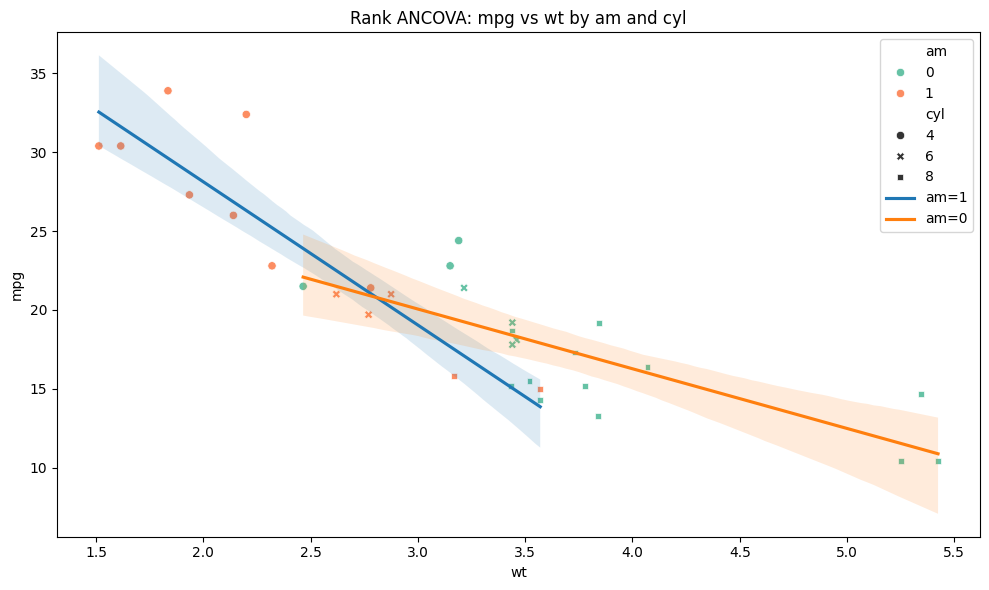

In [273]:
# 9.2) 비모수 ANCOVA

# 순위화
df['mpg_rank'] = rankdata(df['mpg'])
df['wt_rank'] = rankdata(df['wt'])

# mpg_rank ~ wt_rank + am + cyl (공변량과 종속변수 모두 순위화)
model_rank = ols('mpg_rank ~ wt_rank + C(am) + C(cyl)', data=df).fit()
rank_result = anova_lm(model_rank, typ=2)

print("🔎 Rank ANCOVA 결과")
display(rank_result)


from scipy.stats import mannwhitneyu
import scikit_posthocs as sp

# am에 대한 Mann–Whitney U test (이항)
g0 = df[df['am'] == 0]['mpg']
g1 = df[df['am'] == 1]['mpg']
stat, p_val = mannwhitneyu(g0, g1)
print(f'\n🧪 Mann–Whitney U test for am: p = {p_val:.4f}')

# cyl에 대한 Dunn's test
dunn_result = sp.posthoc_dunn(df, val_col='mpg', group_col='cyl', p_adjust='bonferroni')
print("\n🧪 Dunn's test for cyl")
display(dunn_result)


# 회귀선은 원래값 기준 (Rank는 해석 어려움)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='wt', y='mpg', hue='am', style='cyl', palette='Set2')
for val in df['am'].unique():
    sns.regplot(data=df[df['am'] == val], x='wt', y='mpg', scatter=False, label=f'am={val}')
plt.title('Rank ANCOVA: mpg vs wt by am and cyl')
plt.legend()
plt.tight_layout()
plt.show()


#### 10. MANCOVA
- 종속변수 : 2개 이상 (필수)
- 요인 : 1개 이상 (범주형)
- 수치형 공변량 : 1개 이상 (필수)  

조건
1. 정규성 : 종속변수들이 정규분포를 따른다
2. 등분산 : Box'M test로 공분산 행렬이 동일해야한다
3. 선형성 : 종속변수간, 종속변수 - 공변량 간 관계가 선형적
4. 공변량과 독립변수의 독립성 : 공변량은 집단에 따라 유의하게 차이가 나지 않는다
5. 공변량과 종속변수의 선형성

In [274]:
# -----------------------------
from numpy.random import default_rng
rng = default_rng(42)
n_per_group = 60
groups = np.repeat(['A','B','C'], n_per_group)

# 공변량: IQ (집단간 평균은 유사하게 설정 -> 공변량-요인 독립 가정 충족)
IQ = np.concatenate([
    rng.normal(110, 10, n_per_group),
    rng.normal(111, 10, n_per_group),
    rng.normal(109, 10, n_per_group)
])

# 진짜 회귀식: (집단효과 + IQ효과 + 잡음)
# 집단 평균 차이를 일부 부여 (C > B > A)
base_math  = {'A':70, 'B':74, 'C':78}
base_sci   = {'A':68, 'B':72, 'C':77}

math = np.array([base_math[g] for g in groups])  + 0.25*IQ + rng.normal(0, 6, len(groups))
sci  = np.array([base_sci[g]  for g in groups])  + 0.22*IQ + rng.normal(0, 6, len(groups))

df = pd.DataFrame({'method':groups, 'IQ':IQ, 'math':math, 'science':sci})
df.head()

,method,IQ,math,science
0,A,113.047171,106.097803,91.955242
1,A,99.600159,96.216335,92.212398
2,A,117.504512,96.910565,99.849938
3,A,119.405647,106.489144,87.918026
4,A,90.489648,95.194951,87.157668


In [275]:
# 교육방법 - Method
# 공변량 - IQ
# 종속변수 - math, science

# 모수적
# 1) 다변량 정규성
# 1.1) 전체 데이터에 관해서 종속변수 y들의 값는 정규성을 가진다.
t1 = pg.multivariate_normality(df[['math','science']], alpha = 0.05)
print(t1)

# 1.2) Method 별 정규성
for m in df.method.unique() :
  t2 = pg.multivariate_normality(df.loc[df['method'] == m, ['math','science']], alpha =0.05)
  print([m,t2])


# 2) 공분산 행렬의 동질성 - 학습효과별로 종속변수 y들의 공분산 행렬은 동일하다.
box =  pg.box_m(dvs = ['math','science'], group= 'method', data=df)

# 3) 선형성 - 공변량과 각 종속변수 (상관분석처리)
corr_math = df[['IQ','math']].corr().iloc[0,1]
corr_sci  = df[['IQ','science']].corr().iloc[0,1]

# 4) 학습방법과 공변량(IQ)에 집단간 차이가 없다.
iq_method = ols(f'IQ ~ C(method)', data = df).fit()
print(sm.stats.anova_lm(iq_method))

HZResults(hz=np.float64(0.36667128949472105), pval=np.float64(0.9342780777105235), normal=True)
['A', HZResults(hz=np.float64(0.302239471429378), pval=np.float64(0.9103756874320372), normal=True)]
['B', HZResults(hz=np.float64(0.5259907022572496), pval=np.float64(0.43184288501140866), normal=True)]
['C', HZResults(hz=np.float64(0.4082064043795014), pval=np.float64(0.6989520524497683), normal=True)]
              df        sum_sq    mean_sq         F    PR(>F)
C(method)    2.0    146.126740  73.063370  0.974099  0.379547
Residual   177.0  13276.081884  75.006112       NaN       NaN


In [276]:
# -----------------------------
# 3. MANCOVA 본 분석 (다변량)
# -----------------------------
# statsmodels MANOVA에 공변량 포함: 'math + science ~ C(method) + IQ'
mancova = MANOVA.from_formula('math + science ~ C(method) + IQ', data=df)
print("\n### MANCOVA 결과(다변량) ###")
print(mancova.mv_test())

# -----------------------------
# 4. 사후 해석(실무형): '공변량 보정 잔차'로 집단 비교 (DV별)
#    - 각 DV에서: DV ~ IQ 회귀 → 잔차(=IQ 보정 결과) → Tukey HSD
# -----------------------------
posthoc_results = {}
for dv in ['math','science']:
    model = ols(f'{dv} ~ IQ', data=df).fit()
    df[dv+'_resid'] = model.resid   # IQ 보정 잔차
    tuk = pairwise_tukeyhsd(endog=df[dv+'_resid'], groups=df['method'], alpha=0.05)
    posthoc_results[dv] = tuk.summary()

print("\n### 사후검정 (IQ 보정 잔차로 Tukey) ###")
for dv, summ in posthoc_results.items():
    print(f"\n[{dv}]")
    print(summ)



### MANCOVA 결과(다변량) ###
                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.3598 2.0000 175.0000 155.6860 0.0000
         Pillai's trace 0.6402 2.0000 175.0000 155.6860 0.0000
 Hotelling-Lawley trace 1.7793 2.0000 175.0000 155.6860 0.0000
    Roy's greatest root 1.7793 2.0000 175.0000 155.6860 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
        C(method)        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.5992 4.0000 350.0000 25.5340 0.0000
          Pillai's trace 0.4008 4.0000 352.0000 2

In [277]:
# 비모수적 -Rank변환 후 사후분석
df_rank = df.copy()
for col in ['IQ','math','science']:
    # 평균랭크(동순위 보정): method='average'
    df_rank[col] = df_rank[col].rank(method='average')

# 1) Rank-MANCOVA (다변량)
mancova_rank = MANOVA.from_formula('math + science ~ C(method) + IQ', data=df_rank)
print("\n### Rank-MANCOVA 결과(다변량) ###")
print(mancova_rank.mv_test())

# 2) Rank-ANCOVA식 사후검정: (DV_rank ~ IQ_rank) 잔차 → Tukey
posthoc_rank = {}
for dv in ['math','science']:
    mod = ols(f'{dv} ~ IQ', data=df_rank).fit()
    df_rank[dv+'_rresid'] = mod.resid
    tuk = pairwise_tukeyhsd(endog=df_rank[dv+'_rresid'], groups=df_rank['method'], alpha=0.05)
    posthoc_rank[dv] = tuk.summary()

print("\n### Rank-사후검정 (IQ 랭크 보정 잔차로 Tukey) ###")
for dv, summ in posthoc_rank.items():
    print(f"\n[{dv}]")
    print(summ)


### Rank-MANCOVA 결과(다변량) ###
                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.7966 2.0000 175.0000 22.3365 0.0000
         Pillai's trace 0.2034 2.0000 175.0000 22.3365 0.0000
 Hotelling-Lawley trace 0.2553 2.0000 175.0000 22.3365 0.0000
    Roy's greatest root 0.2553 2.0000 175.0000 22.3365 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
       C(method)        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.5831 4.0000 350.0000 27.0853 0.0000
         Pillai's trace 0.4169 4.0000 352.0000 23.1730 0.0

#### 11. 혼합 설계 (Mixed ANOVA)

In [278]:
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/mixedanova.csv")
df.head()

,id,genotype,before,after
0,1,A,1.53,4.08
1,2,A,1.83,4.84
2,3,A,1.38,4.26
3,4,A,1.92,4.35
4,5,A,1.30,4.79


In [279]:
# Between - genotype
# Within - before, after
# 그룹별, 사전, 사후가 같이 있는 형태


df_melt = pd.melt(
                  df.reset_index() ,
                  id_vars =['id','genotype'] ,
                  value_vars = ['before', 'after'] ,
                  var_name = 'Time' , value_name = 'yield'
)
df_melt.head(5)
# genotype : between suject 요인
# TIme : within subest 요인
# yeld : 종속변수


res = []
df_melt['combo']= df_melt['genotype'] + '_' + df_melt['Time']
print(df_melt.head(4))
for key, group in df_melt.groupby('combo') :
  stat, p_val = stats.shapiro(group['yield'])

  res.append({
      '조합' : key,
      'pvalue' : p_val,
      'Decision' : '정규분포이다' if p_val > 0.05 else '정규분포가 아니다',
  })
res = pd.DataFrame(res)

g = [group['yield'] for name, group in df_melt.groupby('combo')]
stat, leven_p = stats.levene(* g)

res['leven_pval'] = leven_p
res

   id genotype    Time  yield     combo
0   1        A  before   1.53  A_before
1   2        A  before   1.83  A_before
2   3        A  before   1.38  A_before
3   4        A  before   1.92  A_before


,조합,pvalue,Decision,leven_pval
0,A_after,0.362694,정규분포이다,0.286802
1,A_before,0.461201,정규분포이다,0.286802
2,B_after,0.687226,정규분포이다,0.286802
3,B_before,0.396233,정규분포이다,0.286802
4,C_after,0.054206,정규분포이다,0.286802
5,C_before,0.784187,정규분포이다,0.286802



Group 간 yield 평균 차이가 없음
Time : Before, After간 평균 차이 없음
Interaction : 상호작용 없음 (두 요인이 독립적)



,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,genotype,10.242987,2,12,5.121493,16.351889,3.741297e-04,0.731566,NaN
1,Time,31.868213,1,12,31.868213,373.404574,2.083410e-10,0.968864,1.0
2,Interaction,4.100347,2,12,2.050173,24.022184,6.371677e-05,0.800148,NaN


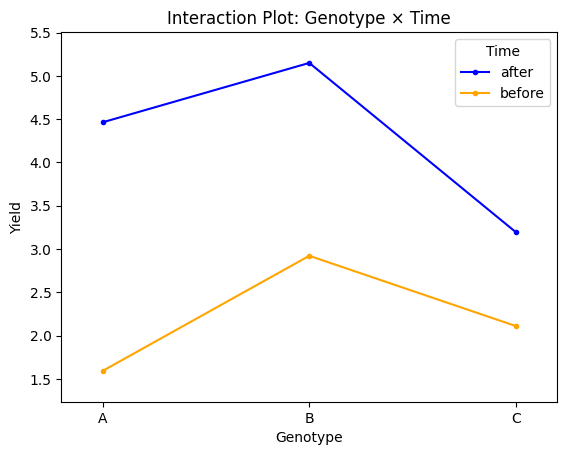


POST HOC TESTS

Contrast         Time    A      B       Paired    Parametric         T     dof  alternative      p-unc    p-corr  p-adjust         BF10    hedges
---------------  ------  -----  ------  --------  ------------  ------  ------  -------------  -------  --------  ----------  ---------  --------
Time             -       after  before  True      True           9.331  14.000  two-sided        0.000   nan      nan         69270.000     2.427
genotype         -       A      B       False     True          -3.390   8.000  two-sided        0.009     0.028  sidak           5.399    -1.937
genotype         -       A      C       False     True           3.020   8.000  two-sided        0.017     0.049  sidak           3.726     1.725
genotype         -       B      C       False     True           4.775   8.000  two-sided        0.001     0.004  sidak          21.200     2.728
Time * genotype  after   A      B       False     True          -1.810   8.000  two-sided        0.108     

In [280]:

print('''
Group 간 yield 평균 차이가 없음
Time : Before, After간 평균 차이 없음
Interaction : 상호작용 없음 (두 요인이 독립적)
''')

aov = pg.mixed_anova(
    dv='yield', between='genotype',
    within='Time', subject='id',
    data=df_melt, correction=False, effsize='np2'
)
display(aov)

fig = interaction_plot(
    x=df_melt['genotype'], trace=df_melt['Time'],
    response=df_melt['yield'], colors=['blue','orange']
)
plt.title('Interaction Plot: Genotype × Time')
plt.xlabel('Genotype')
plt.ylabel('Yield')
plt.show()

# 사후분석
post = pg.pairwise_tests(
    data=df_melt, dv='yield',
    between='genotype', within='Time',
    subject='id', padjust='sidak'
)
pg.print_table(post)

#### 상관계수
1. 편상관계수
- 두 변수간의 순수한 상관을 나타낸다. 제 3의 변수의 영향을 제거한 후의 상관
- 다른 변수의 효과를 통제한 상관계수

In [284]:
# 1. 편상관계수
# 두 변수간의 순수한 상관을 나타낸다. 제 3의 변수의 영향을 제거한 후의 상관
# 다른 변수의 효과를 통제한 상관계수

from palmerpenguins import load_penguins
import pingouin as pg

# 데이터 로드
df = load_penguins().dropna(subset=['bill_length_mm','bill_depth_mm','flipper_length_mm'])

# 편상관: bill_length를 통제한 상태에서 bill_depth와 flipper_length의 관계
pcorr = pg.partial_corr(data=df, x='bill_depth_mm', y='flipper_length_mm', covar='bill_length_mm')
print("편상관 결과:\n", pcorr)
print('''
해석 : bill_length_mm (부리길이)가 공통원인으로 작용해서,Y1-Y2의 상관을 강화시켰다.
      이를 제거하고 순수한 관계를 보면 진짜 관계는 이정도다.
''')

편상관 결과:
            n         r           CI95%         p-val
pearson  342 -0.585735  [-0.65, -0.51]  8.593353e-33

해석 : bill_length_mm (부리길이)가 공통원인으로 작용해서,Y1-Y2의 상관을 강화시켰다. 
      이를 제거하고 순수한 관계를 보면 진짜 관계는 이정도다. 



#### 2. 등위상관계수 [비모수적 검정]
- 범주형 (순위, 서열)일때, spearnmanr, kendailtau 두 개가 가능
- 정규분포가 따르지 않거나, 이상치가 있을때, 순위를 매켜서 견고한 관계를 확인

In [286]:
from scipy.stats import spearmanr, kendalltau


x = df['bill_length_mm']
y = df['flipper_length_mm']

# Pearson (일반 상관)
pearson_r = x.corr(y, method='pearson')

# Spearman (등위상관)
spearman_r, spearman_p = spearmanr(x, y)

# Kendall (등위상관)
kendall_r, kendall_p = kendalltau(x, y)

print("Pearson 상관:", round(pearson_r,3))
print("Spearman 등위상관:", round(spearman_r,3), "p=", spearman_p)
print("Kendall 등위상관:", round(kendall_r,3), "p=", kendall_p)

Pearson 상관: 0.656
Spearman 등위상관: 0.673 p= 2.0669356276079494e-46
Kendall 등위상관: 0.483 p= 1.7471887323081624e-39


#### 3. 정준상관분석
- 두 변수 "군 Group"에 대해서 살펴볼떄 , 집합 간 대칭적 관계를 본다.
- Ex) 인지능력검사 (X집합) VS 학업 성취도 (Y집합)

In [288]:
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
# X 집합 (부리 관련)
X = df[['bill_length_mm','bill_depth_mm']]

# Y 집합 (체형 관련)
Y = df[['flipper_length_mm','body_mass_g']]

# 표준화 (CCA는 스케일에 민감)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
Y_std = scaler.fit_transform(Y)

# 정준상관분석
cca = CCA(n_components=2)
X_c, Y_c = cca.fit_transform(X_std, Y_std)

# 첫 번째 정준상관
corr1 = pd.Series(X_c[:,0]).corr(pd.Series(Y_c[:,0]))
# 두 번째 정준상관
corr2 = pd.Series(X_c[:,1]).corr(pd.Series(Y_c[:,1]))

print("첫 번째 정준상관:", round(corr1,3))
print("두 번째 정준상관:", round(corr2,3))

첫 번째 정준상관: 0.791
두 번째 정준상관: 0.1


#### 4. 부분 상관 계수
- Y1 ~ X1 + X2 모델에서, X2의 영향을 제거한, X1, Y의 상관을 봄으로, X1의 순수 기여도
- 편 상관계수는 제3변수를 두 변수 모두에서 제거하지만, 부분 상관계수는 3변수를 한쪽에서만 제거한다.


#### 5. 다변량 상관계수
- 여러 독립 변수들의 선형결합

In [289]:
# 가상 데이터 생성
np.random.seed(1)
n = 50
X1 = np.random.normal(0,1,n)
X2 = 0.5*X1 + np.random.normal(0,1,n)  # X1과 상관 있는 변수
Y  = 0.7*X1 + 0.2*X2 + np.random.normal(0,1,n)

df = pd.DataFrame({'X1':X1, 'X2':X2, 'Y':Y})

# 1) 회귀분석 (Y ~ X1 + X2)
X = sm.add_constant(df[['X1','X2']])
model = sm.OLS(df['Y'], X).fit()
print(model.summary())

# 2) 다변량 상관계수 R
R = np.corrcoef(model.fittedvalues, df['Y'])[0,1]
print("다변량 상관계수 R =", round(R,3))
print("설명력 R^2 =", round(R**2,3))

# 3) 부분상관 (Semi-partial)
# Semi-partial(X1,Y|X2) = corr(resid(X1~X2), Y)
resid_X1 = sm.OLS(df['X1'], sm.add_constant(df['X2'])).fit().resid
semi_r_X1 = np.corrcoef(resid_X1, df['Y'])[0,1]

# Semi-partial(X2,Y|X1)
resid_X2 = sm.OLS(df['X2'], sm.add_constant(df['X1'])).fit().resid
semi_r_X2 = np.corrcoef(resid_X2, df['Y'])[0,1]

print("부분상관(X1,Y|X2) =", round(semi_r_X1,3))
print("부분상관(X2,Y|X1) =", round(semi_r_X2,3))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     20.48
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           4.01e-07
Time:                        07:41:06   Log-Likelihood:                -63.995
No. Observations:                  50   AIC:                             134.0
Df Residuals:                      47   BIC:                             139.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0926      0.129      0.717      0.4

#### 12. 대응일치분석
- 범주형 교차표를 시각화하는 다변량 분석 기법
- 범주 간 유상성/관계를 저차원 공원에 시각화 해줌

In [290]:
# 데이터: 펭귄 종별 × 섬별 빈도 교차표
df = load_penguins().dropna(subset=['species','island'])
ct = pd.crosstab(df['species'], df['island'])
print("교차표:\n", ct)

교차표:
 island     Biscoe  Dream  Torgersen
species                            
Adelie         44     56         52
Chinstrap       0     68          0
Gentoo        124      0          0


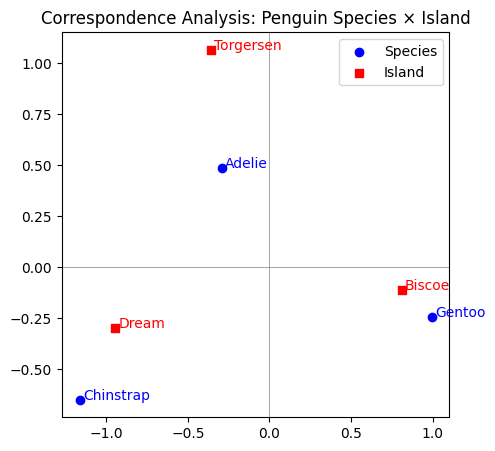

In [297]:
#!pip install palmerpenguins prince
import prince  # Correspondence Analysis library

ca = prince.CA(n_components=2, random_state=42)
ca = ca.fit(ct)

# 행/열좌표
row = ca.row_coordinates(ct)
col = ca.column_coordinates(ct)

fig, ax = plt.subplots(figsize = (5,5))
ax.axhline(0, color = 'grey', linewidth = 0.5)
ax.axvline(0, color='grey', linewidth=0.5)

# 행(종)
ax.scatter(row[0], row[1], color='blue', label='Species')
for i, txt in enumerate(ct.index):
    ax.text(row.iloc[i,0]+0.02, row.iloc[i,1], txt, color='blue')

# 열(섬)
ax.scatter(col[0], col[1], color='red', marker='s', label='Island')
for i, txt in enumerate(ct.columns):
    ax.text(col.iloc[i,0]+0.02, col.iloc[i,1], txt, color='red')

ax.set_title("Correspondence Analysis: Penguin Species × Island")
ax.legend()
plt.show()


#### 13. MDS 다차원 분석
- 객체간의 유사도- 거리 행렬을 가지고 유사성/차이를 시각화

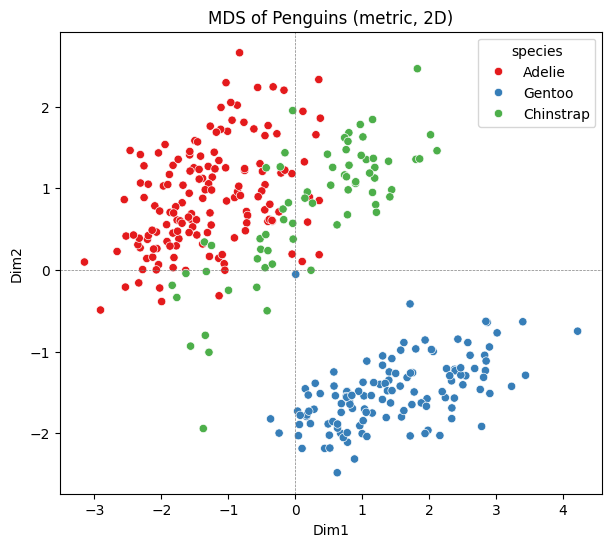

In [304]:
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS

X = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
y = df['species']

for col in X.columns :
  if X[col].isna().sum() > 0 :
    X[col].fillna(X[col].mean(), inplace = True)


X.isna().sum()

# 표준화
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# 거리행렬 (유클리드)
dist_matrix = pairwise_distances(X_std, metric='euclidean')

# MDS (2차원)
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
X_mds = mds.fit_transform(dist_matrix)

df_plot = pd.DataFrame(X_mds, columns=['Dim1','Dim2'])
df_plot['species'] = y.values

# 시각화
plt.figure(figsize=(7,6))
sns.scatterplot(data=df_plot, x='Dim1', y='Dim2', hue='species', palette='Set1')
plt.title("MDS of Penguins (metric, 2D)")
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.show()

##### 14. 컨조인트 분석
- 여러 속성과 수준(Level)이 의사결정에 미치는 영향을 추정한다.
- 제품을 여러가지 속성 조합으로 제시해서, 선호도/선택 데이터를 분석해서, 속성과 수준을 선호하는지 계량화


In [311]:
import itertools
# -----------------------------
# 1. 속성/수준 정의
# -----------------------------
attributes = {
    'Brand': ['A','B'],
    'Price': ['Low','High'],
    'Battery': ['Short','Long']
}

# 모든 조합(2×2×2 = 8개 프로파일)
profiles = pd.DataFrame(list(itertools.product(*attributes.values())), columns=attributes.keys())

# -----------------------------
# 2. 가상 응답 데이터 생성 (선호도 rating)
#    (실제는 설문으로 수집)
# -----------------------------
import numpy as np
np.random.seed(42)

# 효용 가정: Brand=A 선호(+2), Price=Low 선호(+3), Battery=Long 선호(+4)
utility = (
    (profiles['Brand']=='A').astype(int)*2 +
    (profiles['Price']=='Low').astype(int)*3 +
    (profiles['Battery']=='Long').astype(int)*4
)

# 잡음 추가
profiles['Rating'] = utility + np.random.normal(0,1,len(profiles))

print("Profiles with Ratings:")
print(profiles)

Profiles with Ratings:
  Brand Price Battery    Rating
0     A   Low   Short  5.496714
1     A   Low    Long  8.861736
2     A  High   Short  2.647689
3     A  High    Long  7.523030
4     B   Low   Short  2.765847
5     B   Low    Long  6.765863
6     B  High   Short  1.579213
7     B  High    Long  4.767435


In [314]:
# -----------------------------
# 3. 회귀분석으로 part-worth 추정
# -----------------------------
# 범주형 더미변수화
X = pd.get_dummies(profiles[['Brand','Price','Battery']], drop_first=True)
y = profiles['Rating']

# Convert boolean columns to integers
X = X.astype(int)

model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

# -----------------------------
# 4. 효용 & 속성 중요도 계산
# -----------------------------
part_worths_raw = model.params.drop('const')
print("\nPart-worth utilities:")

part_worths = {}
for attr, levels in attributes.items():
    # Get the part-worths for the levels of the current attribute
    attr_part_worths = {}
    for level in levels:
        dummy_col = f'{attr}_{level}'
        if dummy_col in part_worths_raw.index:
            attr_part_worths[level] = part_worths_raw[dummy_col]
        # If the level was dropped, its part-worth is the negative sum of other levels (or 0 if only one level)
        else:
             # Assuming the dropped level is the first one in the original list
            attr_part_worths[level] = 0

    # Center the part-worths for each attribute
    mean_part_worth = sum(attr_part_worths.values()) / len(attr_part_worths)
    part_worths[attr] = {level: pw - mean_part_worth for level, pw in attr_part_worths.items()}
    print(f"\n{attr}: {part_worths[attr]}")


# 속성 중요도 = (각 속성 내 max-min)/합
importance = {}
for attr, pworths in part_worths.items():
    max_min = max(pworths.values()) - min(pworths.values())
    importance[attr] = max_min

total_importance = sum(importance.values())
importance = {k: v/total_importance for k,v in importance.items()}

print("\nAttribute Importance:")
print(importance)

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     61.26
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           0.000845
Time:                        08:04:38   Log-Likelihood:                -3.0300
No. Observations:                   8   AIC:                             14.06
Df Residuals:                       4   BIC:                             14.38
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.1393      0.353     20.202

In [316]:
# -----------------------------
# 4. 효용 & 속성 중요도 계산
# -----------------------------
importance = {}
for attr in attributes.keys():
    levels = [col for col in X.columns if col.startswith(attr+'_')]
    if len(levels) > 0:
        max_min = part_worths[levels].max() - part_worths[levels].min()
        importance[attr] = float(max_min)

total = sum(importance.values())

if total > 0:
    importance = {k: v/total for k,v in importance.items()}
else:
    importance = {k: 0 for k in importance.keys()}  # 중요도=0 처리

print("\nAttribute Importance:")
print(importance)


Attribute Importance:
{'Brand': 0, 'Price': 0, 'Battery': 0}
